In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

def make_num_list(df):
    num_list = []
    i = 1
    while i < len(df)+1:
        num_list.append(i)
        i = i + 1
    df_new = df.copy()
    df_new['num'] = num_list
    return df_new

def time_list(df, t1, t2, graph): # 1-обычный, 2 - триграф
    df = make_num_list(df)
    t_list = []
    i = 1
    while i < len(df) - graph + 1:
        new_time = (int(df.loc[df['num'] == (i+graph)][t1])-int(df.loc[df['num'] == i][t2]))/1000
        t_list.append(new_time)
        i = i + 1
    while graph > 0:
        t_list.append(0)
        graph = graph - 1
    return t_list

def create_and_save_mouse(df):
    df_mouse = df.loc[df['action_type'] == 'mouse']
    df_mouse_time = df_mouse[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
    #df_mouse_time.to_csv(name + '.csv')
    return df_mouse_time

def do_features(df):
    df['DD'] = time_list(df, 'down', 'down', 1)
    df['UD'] = time_list(df, 'down', 'up', 1)
    df['UU'] = time_list(df, 'up', 'up', 1)
    df['DU'] = time_list(df, 'up', 'down', 1)
    df['DD3'] = time_list(df, 'down', 'down', 2)
    df['UD3'] = time_list(df, 'down', 'up', 2)
    df['UU3'] = time_list(df, 'up', 'up', 2)
    df['DU3'] = time_list(df, 'up', 'down', 2)
    df['DD4'] = time_list(df, 'down', 'down', 3)
    df['UD4'] = time_list(df, 'down', 'up', 3)
    df['UU4'] = time_list(df, 'up', 'up', 3)
    df['DU4'] = time_list(df, 'up', 'down', 3)
    df['DD5'] = time_list(df, 'down', 'down', 4)
    df['UD5'] = time_list(df, 'down', 'up', 4)
    df['UU5'] = time_list(df, 'up', 'up', 4)
    df['DU5'] = time_list(df, 'up', 'down', 4)
    df['kpm5'] = kpm(df, 5)
    df['kpm10'] = kpm(df, 10)
    df['skew5_time'] = skew_text_input(df, 5, 'time')
    df['skew10_time'] = skew_text_input(df, 10, 'time')
    df['skew20_time'] = skew_text_input(df, 10, 'time')
    df['skew5_kpm5'] = skew_text_input(df, 5, 'kpm5')
    df['skew10_kpm5'] = skew_text_input(df, 10, 'kpm5')
    df['skew5_kpm10'] = skew_text_input(df, 5, 'kpm10')
    df['skew10_kpm10'] = skew_text_input(df, 10, 'kpm10')
    #df['error_rate'] = error_rate(df, 20)
    return df

def kpm(df, num):
    df = make_num_list(df)
    v = []
    i = 1
    while i < len(df) - num + 1:
        t = (int(df.loc[df['num'] == (i+num-1)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        new_v = num/t
        v.append(new_v*60)
        i = i + 1
    while num > 0:
        t = (int(df.loc[df['num'] == (i+num-2)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        print('t='+str(t))
        print('num='+str(num))
        new_v = num/t
        v.append(new_v)
        i += 1
        num = num - 1
    return v

def skew_text_input(df, num, feature):
    s = []
    list_feature = list(df[feature])
    i = 0
    while i < len(df) - num + 1:
        s.append(skew(list_feature[i:i+num]))
        i = i + 1
    while num > 1:        
        s.append(skew(list_feature[i:i+num-1]))
        i += 1
        num = num - 1
    return s

def num_of_error(l):
    num = 0
    for i in l:
        if 0<i<3:
            num += 1
    return num

def error_rate(df, num):
    error_rate_list = []
    key_code = list(df['key_code'])
    i = 0
    while i < len(df) - num + 1:
        rate = num_of_error(key_code[i:i+num])/num
        error_rate_list.append(rate)
        i = i + 1
    while num > 1:
        error_rate_list.append(num_of_error(key_code[i:i+num-1])/(num-1))
        i += 1
        num = num - 1
    return error_rate_list

def remove_outlier (df):
    features = ['time', 'UD', 'DD3', 'DD4', 'DD5']
    for f in features:
        bottom = np.percentile(df[f], 5)
        top = np.percentile(df[f], 95)
        df = df.loc[(bottom < df[f])  & (df[f] < top)].reset_index(drop=True)
    return df

def print_box (df):
    col_name = list(df.columns[7:])
    for f in col_name:
        plt.figure()
        df[['session', f]].boxplot(column=[f], figsize=(6,8))
        
def normalization(df):
    X = df
    cols = list(df.columns)
    scaler.fit(X)
    X = scaler.transform(X)
    return pd.DataFrame(X, columns=cols)

scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
df1 = create_and_save_mouse(pd.read_csv('datasets\dataset_89270693456.csv', delimiter=',')) #Денис_л
df2 = create_and_save_mouse(pd.read_csv('datasets\dataset_89196230374.csv', delimiter=',')) #Никита_л
df3 = create_and_save_mouse(pd.read_csv('datasets\dataset_89270698741.csv', delimiter=',')) #Максим_л
df4 = create_and_save_mouse(pd.read_csv('datasets\dataset_80171109282.csv', delimiter=',')) #Максим_у
df5 = create_and_save_mouse(pd.read_csv('datasets\dataset_89176732344.csv', delimiter=',')) #Даша_л
df6 = create_and_save_mouse(pd.read_csv('datasets\dataset_89273345194.csv', delimiter=',')) #Даша_у
df7 = create_and_save_mouse(pd.read_csv('datasets\dataset_89162735523.csv', delimiter=',')) #Сергей_л
df8 = create_and_save_mouse(pd.read_csv('datasets\dataset_89193729288.csv', delimiter=',')) #Алина_л
df9 = create_and_save_mouse(pd.read_csv('datasets\dataset_89273028630.csv', delimiter=',')) #Люба_л
df10 = create_and_save_mouse(pd.read_csv('datasets\dataset_89163828720.csv', delimiter=',')) #Люба_у

In [16]:
df1

,user_id,session,action_type,key_code,down,up,time
33,89270693456,1,mouse,NaN,1.606151e+12,1.606151e+12,0.061
76,89270693456,1,mouse,NaN,1.606151e+12,1.606151e+12,0.101
128,89270693456,1,mouse,NaN,1.606151e+12,1.606151e+12,0.071
176,89270693456,1,mouse,NaN,1.606151e+12,1.606151e+12,0.116
309,89270693456,1,mouse,NaN,1.606151e+12,1.606151e+12,0.092
...,...,...,...,...,...,...,...
3738,89270693456,10,mouse,NaN,1.606151e+12,1.606151e+12,0.126
3766,89270693456,10,mouse,NaN,1.606151e+12,1.606151e+12,0.104
3802,89270693456,10,mouse,NaN,1.606151e+12,1.606151e+12,0.094
3828,89270693456,10,mouse,NaN,1.606151e+12,1.606151e+12,0.159


## Вычисление признаков

In [4]:
data1 = do_features(df1)
data2 = do_features(df2)
#data3 = do_features(df3)
data4 = do_features(df4)
data5 = do_features(df5)
data6 = do_features(df6)
data7 = do_features(df7)
data8 = do_features(df8)
data9 = do_features(df9)
data10 = do_features(df10)

t=15.261
num=5
t=14.118
num=4
t=2.434
num=3
t=0.159
num=2
t=-8.941
num=1
t=96.257
num=10
t=89.275
num=9
t=77.812
num=8
t=37.714
num=7
t=16.863
num=6
t=15.261
num=5
t=14.118
num=4
t=2.434
num=3
t=0.159
num=2
t=-8.941
num=1
t=31.392
num=5
t=22.046
num=4
t=21.474
num=3
t=0.055
num=2
t=-1.469
num=1
t=-231.186
num=10
t=90.56
num=9
t=81.611
num=8
t=68.205
num=7
t=33.614
num=6
t=31.392
num=5
t=22.046
num=4
t=21.474
num=3
t=0.055
num=2
t=-1.469
num=1
t=9.149
num=5
t=2.735
num=4
t=1.068
num=3
t=0.1
num=2
t=-0.23
num=1
t=30.72
num=10
t=25.893
num=9
t=14.148
num=8
t=13.196
num=7
t=9.566
num=6
t=9.149
num=5
t=2.735
num=4
t=1.068
num=3
t=0.1
num=2
t=-0.23
num=1
t=27.733
num=5
t=23.392
num=4
t=22.87
num=3
t=0.07
num=2
t=-3.186
num=1
t=85.478
num=10
t=63.279
num=9
t=61.102
num=8
t=49.773
num=7
t=29.134
num=6
t=27.733
num=5
t=23.392
num=4
t=22.87
num=3
t=0.07
num=2
t=-3.186
num=1
t=22.426
num=5
t=21.275
num=4
t=2.244
num=3
t=0.107
num=2
t=-1.125
num=1
t=60.052
num=10
t=58.983
num=9
t=50.39
num=8
t=31.

## Удаление выбросов

In [5]:
data1 = remove_outlier(data1)
data2 = remove_outlier(data2)
#data3 = remove_outlier(data3)
data4 = remove_outlier(data4)
data5 = remove_outlier(data5)
data6 = remove_outlier(data6)
data7 = remove_outlier(data7)
data8 = remove_outlier(data8)
data9 = remove_outlier(data9)
data10 = remove_outlier(data10)

## Нормализация

In [6]:
col_name = list(data1.columns[6:])
features_data1 = data1[col_name]
features_data2 = data2[col_name]
#features_data3 = data3[col_name]
features_data4 = data4[col_name]
features_data5 = data5[col_name]
features_data6 = data6[col_name]
features_data7 = data7[col_name]
features_data8 = data8[col_name]
features_data9 = data9[col_name]
features_data10 = data10[col_name]

In [7]:
features_data1 = normalization(features_data1)
features_data2 = normalization(features_data2)
#features_data3 = normalization(features_data3)
features_data4 = normalization(features_data4)
features_data5 = normalization(features_data5)
features_data6 = normalization(features_data6)
features_data7 = normalization(features_data7)
features_data8 = normalization(features_data8)
features_data9 = normalization(features_data9)
features_data10 = normalization(features_data10)

## Зададим y

In [8]:
features_data1['y'] = 0
features_data2['y'] = 0
#features_data3['y'] = 0
features_data4['y'] = 1
features_data5['y'] = 0
features_data6['y'] = 1
features_data7['y'] = 0
features_data8['y'] = 0
features_data9['y'] = 0
features_data10['y'] = 1

## Объединим в один df

In [9]:
dataframe = features_data1
dataframe = dataframe.merge(features_data2, how='outer')
#dataframe = dataframe.merge(features_data3, how='outer')
dataframe = dataframe.merge(features_data4, how='outer')
dataframe = dataframe.merge(features_data5, how='outer')
dataframe = dataframe.merge(features_data6, how='outer')
dataframe = dataframe.merge(features_data7, how='outer')
dataframe = dataframe.merge(features_data8, how='outer')
dataframe = dataframe.merge(features_data9, how='outer')
dataframe = dataframe.merge(features_data10, how='outer')

In [10]:
dataframe.to_csv('bigmouse_df.csv')

In [11]:
dataframe

,time,DD,UD,UU,DU,DD3,UD3,UU3,DU3,DD4,...,kpm5,kpm10,skew5_time,skew10_time,skew20_time,skew5_kpm5,skew10_kpm5,skew5_kpm10,skew10_kpm10,y
0,0.136986,0.373904,0.375133,0.375723,0.375363,1.000000,1.000000,1.000000,1.000000,0.666013,...,0.056139,0.932117,0.395524,0.186690,0.186690,0.301630,0.279772,0.526979,0.382980,0
1,0.684932,1.000000,1.000000,1.000000,1.000000,0.747272,0.745995,0.747151,0.748429,0.698603,...,0.106661,0.758626,0.406193,0.114356,0.114356,0.028170,0.276023,0.820752,0.436580,0
2,0.273973,0.045596,0.046200,0.047068,0.047791,0.311447,0.311089,0.311034,0.311393,0.218863,...,0.636981,0.936481,0.384052,0.234008,0.234008,0.000000,0.278126,0.464787,0.510763,0
3,0.890411,0.433839,0.432852,0.433132,0.434907,0.366982,0.365208,0.364262,0.366038,0.205609,...,0.698441,0.744718,0.008925,0.174054,0.174054,0.336187,0.472982,0.445360,0.453667,0
4,0.904110,0.001311,0.000000,0.000944,0.003645,0.430054,0.428252,0.427119,0.428923,0.293734,...,0.070476,0.597182,0.074006,0.267557,0.267557,0.584856,0.619678,0.591963,0.619159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.828402,0.004106,0.001233,0.003419,0.006323,0.406433,0.405722,0.405502,0.406213,0.227215,...,1.000000,0.805908,0.000000,0.273432,0.273432,0.579782,0.003355,0.000000,0.544960,1
497,0.792899,0.475656,0.473991,0.475190,0.476870,0.407527,0.406931,0.404117,0.404708,0.250626,...,0.492105,0.806119,0.102646,0.284499,0.284499,0.615066,0.000000,0.363963,0.638639,1
498,0.781065,0.005273,0.002570,0.001939,0.004680,0.000000,0.000000,0.000000,0.000000,0.180738,...,0.592888,0.795668,0.175515,0.295463,0.295463,0.791224,0.149778,0.636227,0.726445,1
499,0.662722,1.000000,1.000000,1.000000,1.000000,0.911452,0.910598,0.907970,0.908821,0.639298,...,0.318418,0.293316,0.148203,0.366242,0.366242,0.396881,1.000000,0.189854,0.920122,1


## Корреляция

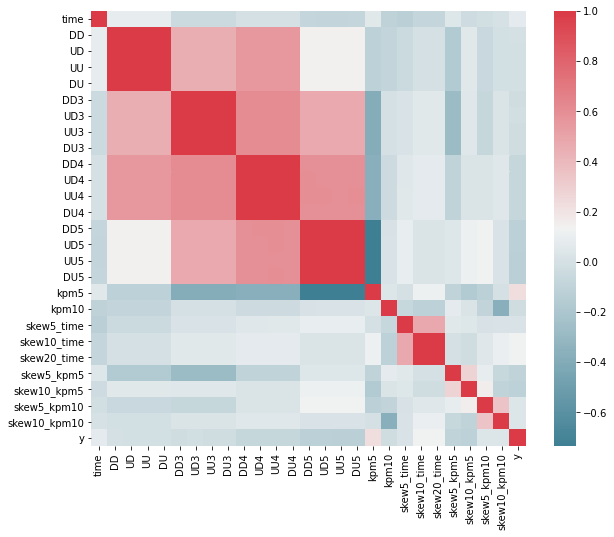

In [27]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

## Удалим лишнее

In [28]:
dataframe.columns

Index(['time', 'DD', 'UD', 'UU', 'DU', 'DD3', 'UD3', 'UU3', 'DU3', 'DD4',
       'UD4', 'UU4', 'DU4', 'DD5', 'UD5', 'UU5', 'DU5', 'kpm5', 'kpm10',
       'skew5_time', 'skew10_time', 'skew20_time', 'skew5_kpm5', 'skew10_kpm5',
       'skew5_kpm10', 'skew10_kpm10', 'y'],
      dtype='object')

In [29]:
dataframe.drop(['DD', 'UD', 'UU', 'DD3', 'UD3', 'UU3', 'DD4', 'UD4', 'UU4', 'DD5', 'UD5', 'UU5', 'skew10_time'], axis=1, inplace=True)

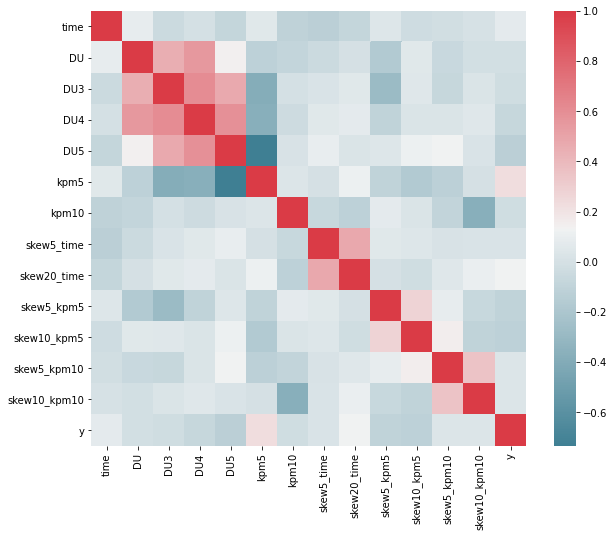

In [30]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

In [31]:
dataframe.to_csv('mouseready_df.csv')

In [32]:
dataframe

,time,DU,DU3,DU4,DU5,kpm5,kpm10,skew5_time,skew20_time,skew5_kpm5,skew10_kpm5,skew5_kpm10,skew10_kpm10,y
0,0.136986,0.375363,1.000000,0.667127,0.782687,0.056139,0.932117,0.395524,0.186690,0.301630,0.279772,0.526979,0.382980,0
1,0.684932,1.000000,0.748429,0.699174,0.642116,0.106661,0.758626,0.406193,0.114356,0.028170,0.276023,0.820752,0.436580,0
2,0.273973,0.047791,0.311393,0.218894,0.108802,0.636981,0.936481,0.384052,0.234008,0.000000,0.278126,0.464787,0.510763,0
3,0.890411,0.434907,0.366038,0.206868,0.084661,0.698441,0.744718,0.008925,0.174054,0.336187,0.472982,0.445360,0.453667,0
4,0.904110,0.003645,0.428923,0.294613,0.738590,0.070476,0.597182,0.074006,0.267557,0.584856,0.619678,0.591963,0.619159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.828402,0.006323,0.406213,0.225987,0.000000,1.000000,0.805908,0.000000,0.273432,0.579782,0.003355,0.000000,0.544960,1
497,0.792899,0.476870,0.404708,0.251412,0.225148,0.492105,0.806119,0.102646,0.284499,0.615066,0.000000,0.363963,0.638639,1
498,0.781065,0.004680,0.000000,0.181970,0.162000,0.592888,0.795668,0.175515,0.295463,0.791224,0.149778,0.636227,0.726445,1
499,0.662722,1.000000,0.908821,0.639351,0.376026,0.318418,0.293316,0.148203,0.366242,0.396881,1.000000,0.189854,0.920122,1


## Dataframe готов